## Creating a Web Data Project with Jupyter Notebooks
******
###### 1. Read in json file(s) resulting from your work with requests/selenium and beautifulsoup

In [1]:
# Import necessary packages
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Read in json files and create dataframes
filename = '2017-02-27.Sweetwater.json'
data = pd.read_json(filename)
filename2 = '2017-03-01.Sweetwater.json'
data2 = pd.read_json(filename2)

###### 2. Clean the data column by column
- Ensure that addresses (or other text data) are consistent 
- Eliminate string characters from numeric values 
- Exclude redundant data as appropriate

In [2]:
# Clean up location data to ensure consistency
data['Location'].replace({'2 Monitors and sub': 'Not Included', 
                          'DFW' : 'Dallas - Fortworth, TX',
                          '84047 Midvale Utah' : 'Midvale, Utah 84047',
                          '08085 swedesboro NJ' : 'Swedesboro, NF 08085'
                         }, inplace=True)

data2['Location'].replace({'2 Monitors and sub': 'Not Included', 
                          'DFW' : 'Dallas - Fortworth, TX',
                          '84047 Midvale Utah' : 'Midvale, Utah 84047',
                          '08085 swedesboro NJ' : 'Swedesboro, NF 08085'
                         }, inplace=True)

In [3]:
#set(data.Location)
#set(data2.Location)

In [4]:
# Eliminate string characters from numeric data
data['Price'] = data['Price'].str.replace('NEGOTIATE','.555')
data['Price'] = data['Price'].str.replace('Trade','.666')
data['Price'] = data['Price'].str.replace('SOLD','.777')
data['Price'] = data['Price'].str.replace('You','.111')
data['Price'] = data['Price'].str.replace('$','')
data['Price'] = data['Price'].str.replace('\xa0','')
data['Price'] = data['Price'].str.replace('.U.S','')
data['Price'] = data['Price'].str.replace(',','')
data['Price'] = data['Price'].str.split().str[0]
data['Price'] = data['Price'].str.split('+').str[0]
data['Price'] = data['Price'].astype(float)

data2['Price'] = data2['Price'].str.replace('NEGOTIATE','.555')
data2['Price'] = data2['Price'].str.replace('Trade','.666')
data2['Price'] = data2['Price'].str.replace('SOLD','.777')
data2['Price'] = data2['Price'].str.replace('You','.111')
data2['Price'] = data2['Price'].str.replace('$','')
data2['Price'] = data2['Price'].str.replace('\xa0','')
data2['Price'] = data2['Price'].str.replace('.U.S','')
data2['Price'] = data2['Price'].str.replace(',','')
data2['Price'] = data2['Price'].str.split().str[0]
data2['Price'] = data2['Price'].str.split('+').str[0]
data2['Price'] = data2['Price'].astype(float)

In [5]:
#set(data.Price)
#set(data2.Price)

In [6]:
# Exclude redundant rows
NoDupsData = data.drop_duplicates()
NoDupsData2 = data2.drop_duplicates()

###### 3. Merge dataframes from separate json files as appropriate
- Find the intersection of two (or more) sets
- Compare the intersection with the newer set to find 'New Products'  
    - When found, add the starting date
- Compare the intersection with the older set to find 'Closed Products'  
    - When found, add the closing date
    - Compare closing date with starting date to find days on market      

In [7]:
# Create the inner merge of the two dataframes
dataInnerMerge = pd.merge(NoDupsData, NoDupsData2, \
                          on=['ID','Location','Title','Price'],\
                          how='inner')

In [8]:
# Determine the set of 'new products'
NoDupsData2['key1'] = 1
dataInnerMerge['key2'] = 1
newProducts = pd.merge(NoDupsData2, dataInnerMerge, \
                      on=['ID', 'Title','Location','Price'], \
                      how = 'left')

# Create the associated dataframe
newProducts = newProducts[newProducts.key2 != newProducts.key1]

# Add the starting date in the dataframe in which the product is first shown

C:\Users\jbavi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [9]:
# Determine the set of 'closed products'
NoDupsData['key1'] = 1
closedProducts = pd.merge(NoDupsData, dataInnerMerge, \
                      on=['ID', 'Title','Location','Price'], \
                      how = 'left')

# Create the associated dataframe
closedProducts = closedProducts[closedProducts.key2 != closedProducts.key1]

# Add the closing date in the dataframe in which the product is last shown


# Find days on market by comparing the starting date with the closing date

C:\Users\jbavi\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


###### 4. Create visualizations
- Histogram of Prices
- Histogram of Days on Market
- Scatter Diagram of Prices vs Days on Market
- Pie Chart of New, Like New, Used

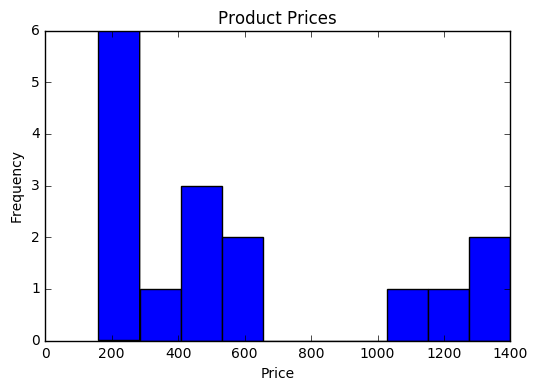

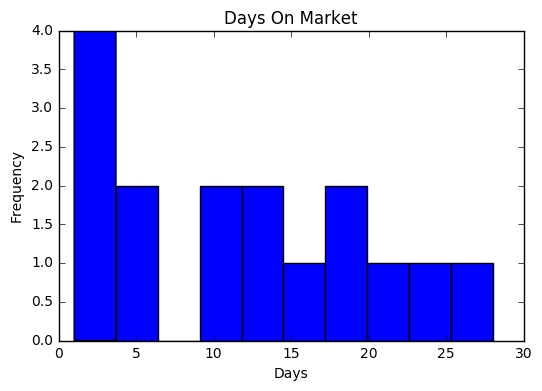

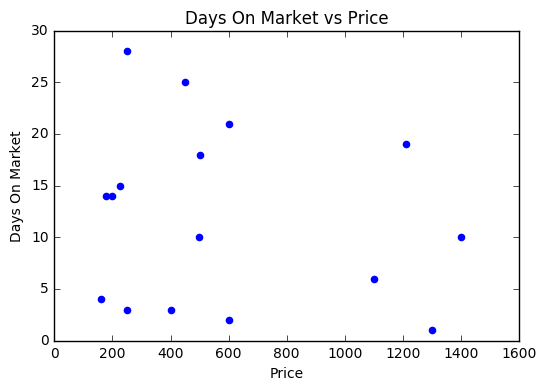

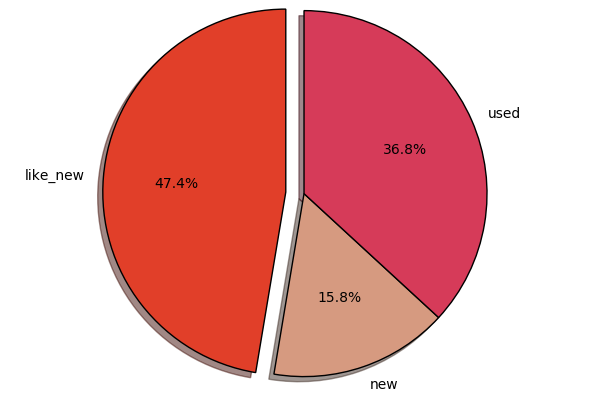

In [10]:
# Create a histogram of Prices
goodPrices = newProducts.Price[newProducts['Price'] > 1.0]
goodPrices = goodPrices[goodPrices < 1500.0]
plt.hist(goodPrices)
plt.title("Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

#Temporary Data for Days on Market ... for Scatter Plot Example
scatterData = {'Price': goodPrices,\
               'daysOnMarket' : \
               np.random.randint(1,30,size=len(goodPrices))}
sD = pd.DataFrame(scatterData)

# Create a histogram of Days on Market
plt.hist(sD.daysOnMarket)
plt.title("Days On Market")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

# Create a Scatter Diagram of Prices vs Days on Market
fig = plt.figure()
ax = fig.add_subplot(111)
x = sD.Price
y = sD.daysOnMarket
ax.scatter(x,y,color='blue')
ax.set_ylim([0,30])
ax.set_xlim([0,1600])

plt.title("Days On Market vs Price")
plt.xlabel("Price")
plt.ylabel("Days On Market")
plt.show()

# Create a Pie Chart of New, Like New, and Used products
colors = ["#E13F29", "#D69A80", "#D63B59"]
# Create a pie chart
plt.pie(
    [newProducts.Condition[newProducts.Condition == 'like new'].count(),\
     newProducts.Condition[newProducts.Condition == 'new'].count(), \
     newProducts.Condition[newProducts.Condition == 'used'].count()],
    labels= ['like_new','new','used'],
    shadow=True,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0.1, 0, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()



###### 5. Trends from your data  
- Search for specific brands and offer counts for each
- Search for product types and offer counts for each
- For each of the above (and other) give counts for day over day or week over week

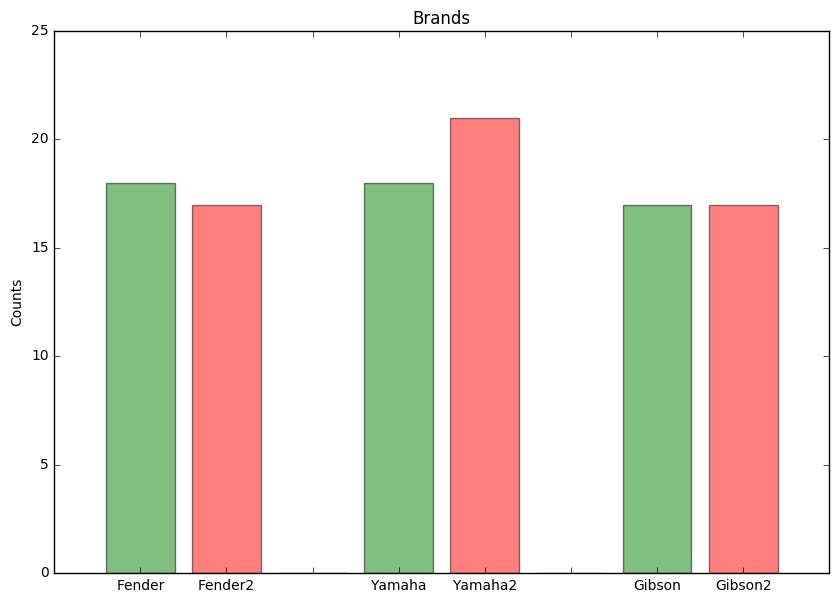

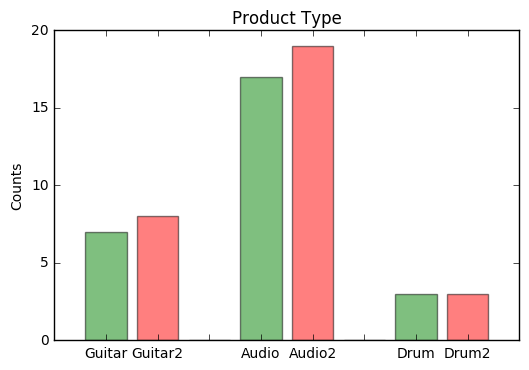

In [12]:
# List the products representing specific brands of your choosing
# for each date provided
fenderData = NoDupsData[NoDupsData['Title'].str.contains('fender ')]
yamahaData = NoDupsData[NoDupsData['Title'].str.contains('yamaha ')]
gibsonData = NoDupsData[NoDupsData['Title'].str.contains('gibson ')]
fenderData2 = NoDupsData2[NoDupsData2['Title'].str.contains('fender ')]
yamahaData2 = NoDupsData2[NoDupsData2['Title'].str.contains('yamaha ')]
gibsonData2 = NoDupsData2[NoDupsData2['Title'].str.contains('gibson ')]

# Create a bar chart of products by brand (for the brands chosen)
fenderCount = len(fenderData)
yamahaCount = len(yamahaData)
gibsonCount = len(gibsonData)
fenderCount2 = len(fenderData2)
yamahaCount2 = len(yamahaData2)
gibsonCount2 = len(gibsonData2)

objects = ('Fender','Fender2','', 'Yamaha', 'Yamaha2','', \
           'Gibson', 'Gibson2')
colors = ('green','red','blue','green','red','blue','green','red')
y_pos = np.arange(len(objects))
performance = [fenderCount,fenderCount2,0,yamahaCount,yamahaCount2,\
               0,gibsonCount,gibsonCount2]
fig = plt.figure(figsize=(10,7))
plt.bar(y_pos, performance, align='center',alpha=0.5, color=colors)
plt.xticks(y_pos, objects)
plt.ylabel('Counts')
plt.title('Brands')
 
plt.show()

# List the products of a specific type
guitarData = NoDupsData[NoDupsData['Title'].str.contains('guitar ')]
audioData = NoDupsData[NoDupsData['Title'].str.contains('audio ')]
drumData = NoDupsData[NoDupsData['Title'].str.contains('drum ')]
guitarData2 = NoDupsData2[NoDupsData2['Title'].str.contains('guitar ')]
audioData2 = NoDupsData2[NoDupsData2['Title'].str.contains('audio ')]
drumData2 = NoDupsData2[NoDupsData2['Title'].str.contains('drum ')]


# Create a bar chart of products by specific type
# for each date provided
guitarCount = len(guitarData)
audioCount = len(audioData)
drumCount = len(drumData)
guitarCount2 = len(guitarData2)
audioCount2 = len(audioData2)
drumCount2 = len(drumData2)

objects = ('Guitar','Guitar2','', 'Audio','Audio2','', 'Drum','Drum2')
y_pos = np.arange(len(objects))
performance = [guitarCount,guitarCount2,0,audioCount,audioCount2,\
               0,drumCount,drumCount2]
colors = ('green','red','blue','green','red','blue','green','red') 
plt.bar(y_pos, performance, align='center', alpha=0.5, color=colors)
plt.xticks(y_pos, objects)
plt.ylabel('Counts')
plt.title('Product Type')
 
plt.show()

In [ ]:
fenderData[['Link','Title']]

In [ ]:
drumData[['Link','Title']]